# Forming a Magic Square

This is my solution for Hacker Rank's ["Forming a Magic Square"](https://www.hackerrank.com/challenges/magic-square-forming/problem) problem.

# Generating all 3x3 Magic Squares

There is [only one 3x3 magic square](https://en.wikipedia.org/wiki/Magic_square#Number_of_magic_squares_of_a_given_order), all others are rotations and reflections.

In [1]:
m1 = [
    [8, 1, 6],
    [3, 5, 7],
    [4, 9, 2]
]

Starting with a magic square, 3 different magic squares can be created by reflecting the original square horizontally, vertically, and both vertically and horizontally.

In [2]:
def reflect_horizontal(square):
    '''Returns the reflection of square with respect to the middle row.'''
    reflected = [x[:] for x in square]
    
    reflected[0] = square[2]
    reflected[2] = square[0]
    
    return reflected

In [3]:
m2 = reflect_horizontal(m1)
m2

[[4, 9, 2], [3, 5, 7], [8, 1, 6]]

To display this better:

In [4]:
def s_print(square):
    [print(row) for row in square]
    print("")

In [5]:
s_print(m2)

[4, 9, 2]
[3, 5, 7]
[8, 1, 6]



In [6]:
def reflect_vertical(square):
    '''Returns the reflection of square with respect to the middle column.'''
    reflected = [x[:] for x in square]
    transpose = [r for r in zip(*square)]
    
    reflected[0] = transpose[2]
    reflected[1] = transpose[1]
    reflected[2] = transpose[0]
    
    # Transpose again.
    # list(r) just converts the tuples into lists (so squares are consistently displayed)
    return [list(r) for r in zip(*reflected)]

In [7]:
m3 = reflect_vertical(m1)
s_print(m3)

[6, 1, 8]
[7, 5, 3]
[2, 9, 4]



In [8]:
m4 = reflect_vertical(reflect_horizontal(m1))
s_print(m4)

[2, 9, 4]
[7, 5, 3]
[6, 1, 8]



Four more magic squares can be created by transposing the original square and executing the same operations.

In [9]:
# The original, but transposed.
m5 = [list(r) for r in zip(*m1)]
s_print(m5)

[8, 3, 4]
[1, 5, 9]
[6, 7, 2]



In [10]:
m6 = reflect_horizontal(m5)
s_print(m6)

[6, 7, 2]
[1, 5, 9]
[8, 3, 4]



In [11]:
m7 = reflect_vertical(m5)
s_print(m7)

[4, 3, 8]
[9, 5, 1]
[2, 7, 6]



In [12]:
m8 = reflect_vertical(reflect_horizontal(m5))
s_print(m8)

[2, 7, 6]
[9, 5, 1]
[4, 3, 8]



All of this can be rolled up into a function and the magic squares stored as a constant.

In [13]:
def generate_magic():
    '''Returns a list of all 3x3 magical squares.'''
    m1 = [
        [8, 1, 6],
        [3, 5, 7],
        [4, 9, 2]
    ]
    magic_squares = [m1]
    
    magic_squares.append(reflect_horizontal(m1))
    magic_squares.append(reflect_vertical(m1))
    magic_squares.append(reflect_vertical(reflect_horizontal(m1)))
    
    m1_transpose = [list(r) for r in zip(*m1)]
    magic_squares.append(m1_transpose)
    
    magic_squares.append(reflect_horizontal(m1_transpose))
    magic_squares.append(reflect_vertical(m1_transpose))
    magic_squares.append(reflect_vertical(reflect_horizontal(m1_transpose)))
    
    return magic_squares

In [14]:
MAGIC_SQUARES = generate_magic()

All magic squares:

In [15]:
[s_print(square) for square in MAGIC_SQUARES]

[8, 1, 6]
[3, 5, 7]
[4, 9, 2]

[4, 9, 2]
[3, 5, 7]
[8, 1, 6]

[6, 1, 8]
[7, 5, 3]
[2, 9, 4]

[2, 9, 4]
[7, 5, 3]
[6, 1, 8]

[8, 3, 4]
[1, 5, 9]
[6, 7, 2]

[6, 7, 2]
[1, 5, 9]
[8, 3, 4]

[4, 3, 8]
[9, 5, 1]
[2, 7, 6]

[2, 7, 6]
[9, 5, 1]
[4, 3, 8]



[None, None, None, None, None, None, None, None]

# Finding the Closest Magic Square

Given a 3x3 square, find the "closest" magical square. The closest magical square has the smallest total distance. Distance is the sum of the absolute differences between corresponding elements in each square. The distance between two elements, $a$ in square 1, $b$ in square 2, is $|a - b|$.

## Distance Between Two Rows

In [16]:
# Helper for comparing two rows.
def row_distance(row1, row2):
    '''Returns the distance between two rows. The distance is the sum of absolute differences 
    between elements in row1 and row2.
    e.g. ([5, 3, 4], [2, 7, 6]) -> 3 + 4 + 2 = 9'''
    distance = 0
    for n in range(3):
        el1 = row1[n]
        el2 = row2[n]
        
        distance += abs(el1 - el2)
    
    return distance

In [17]:
row_distance([5, 3, 4], [2, 7, 6])

9

## Distance Between Two Squares

In [18]:
# A non-magical square
test1 = [
    [5, 3, 4],
    [1, 5, 8],
    [6, 4, 2]
]

In [19]:
# A magical square
s_print(MAGIC_SQUARES[0])

[8, 1, 6]
[3, 5, 7]
[4, 9, 2]



In [20]:
def square_distance(square1, square2):
    '''Returns the distance between two squares. The distance is the sum of the distances between
    rows.'''
    distance = 0
    for i, row1 in enumerate(square1):
        row2 = square2[i]
        distance += row_distance(row1, row2)
    
    return distance

In [21]:
# Distance between test1 and the first magic square
square_distance(test1, MAGIC_SQUARES[0])

17

## The Closest Magical Square

Compare the input square to all possible magical squares to find the closest.

In [22]:
def closest_square(square):
    closest = MAGIC_SQUARES[0]
    min_distance = square_distance(square, closest)
    
    for magic_square in MAGIC_SQUARES[1:]:
        tmp_distance = square_distance(square, magic_square)
        if tmp_distance < min_distance:
            closest = magic_square
            min_distance = tmp_distance
    
    return closest

In [23]:
# The closest magical square to the test1 square.
s_print(closest_square(test1))

[8, 3, 4]
[1, 5, 9]
[6, 7, 2]



# Computing the Cost

The HackerRank problem wants the cost not the closest square. As it happens, the cost of transforming a square into a magical square is equal to the distance between the square and its closest magical partner. Therefore, a slight modification to `closest_square()` is all that is needed.

In [24]:
def transformation_cost(partial_square):
    '''Returns the minimum cost for transforming a square into a magical square.'''
    closest = MAGIC_SQUARES[0]
    min_distance = square_distance(partial_square, closest)
    
    for magic_square in MAGIC_SQUARES[1:]:
        tmp_distance = square_distance(partial_square, magic_square)
        if tmp_distance < min_distance:
            closest = magic_square
            min_distance = tmp_distance
    
    return min_distance

In [25]:
transformation_cost(test1)

7

# Testing

Based on the examples given by HackerRank.

In [26]:
test2 = [
    [4, 9, 2],
    [3, 5, 7],
    [8, 1, 5]
]

In [27]:
# >> 1
transformation_cost(test2)

1

In [28]:
test3 = [
    [4, 8, 2],
    [4, 5, 7],
    [6, 1, 6]
]

In [29]:
# >> 4
transformation_cost(test3)

4

In [30]:
test4 = [
    [4, 4, 7],
    [3, 1, 5],
    [1, 7, 9]
]

In [31]:
# >> 20
transformation_cost(test4)

20

# All Together Now

The following script is what I actually submitted. The only major difference is that `transformation_cost()` is called `formingMagicSquare()`.

In [32]:
def reflect_horizontal(square):
    '''Returns the reflection of square with respect to the middle row.'''
    reflected = [x[:] for x in square]
    
    reflected[0] = square[2]
    reflected[2] = square[0]
    
    return reflected


def reflect_vertical(square):
    '''Returns the reflection of square with respect to the middle column.'''
    reflected = [x[:] for x in square]
    transpose = [r for r in zip(*square)]
    
    reflected[0] = transpose[2]
    reflected[1] = transpose[1]
    reflected[2] = transpose[0]
    
    # Transpose again.
    # list(r) just converts the tuples into lists (so squares are consistently displayed)
    return [list(r) for r in zip(*reflected)]


def generate_magic():
    '''Returns a list of all 3x3 magical squares.'''
    m1 = [
        [8, 1, 6],
        [3, 5, 7],
        [4, 9, 2]
    ]
    magic_squares = [m1]
    
    magic_squares.append(reflect_horizontal(m1))
    magic_squares.append(reflect_vertical(m1))
    magic_squares.append(reflect_vertical(reflect_horizontal(m1)))
    
    m1_transpose = [list(r) for r in zip(*m1)]
    magic_squares.append(m1_transpose)
    
    magic_squares.append(reflect_horizontal(m1_transpose))
    magic_squares.append(reflect_vertical(m1_transpose))
    magic_squares.append(reflect_vertical(reflect_horizontal(m1_transpose)))
    
    return magic_squares


MAGIC_SQUARES = generate_magic()


# Helper for comparing two rows.
def row_distance(row1, row2):
    '''Returns the distance between two rows. The distance is the sum of absolute differences 
    between elements in row1 and row2.
    e.g. ([5, 3, 4], [2, 7, 6]) -> 3 + 4 + 2 = 9'''
    distance = 0
    for n in range(3):
        el1 = row1[n]
        el2 = row2[n]
        
        distance += abs(el1 - el2)
    
    return distance


def square_distance(square1, square2):
    '''Returns the distance between two squares. The distance is the sum of the distances between
    rows.'''
    distance = 0
    for i, row1 in enumerate(square1):
        row2 = square2[i]
        distance += row_distance(row1, row2)
    
    return distance


def formingMagicSquare(partial_square):
    '''Returns the minimum cost for transforming a square into a magical square.'''
    closest = MAGIC_SQUARES[0]
    min_distance = square_distance(partial_square, closest)
    
    for magic_square in MAGIC_SQUARES[1:]:
        tmp_distance = square_distance(partial_square, magic_square)
        if tmp_distance < min_distance:
            closest = magic_square
            min_distance = tmp_distance
    
    return min_distance

## It worked!

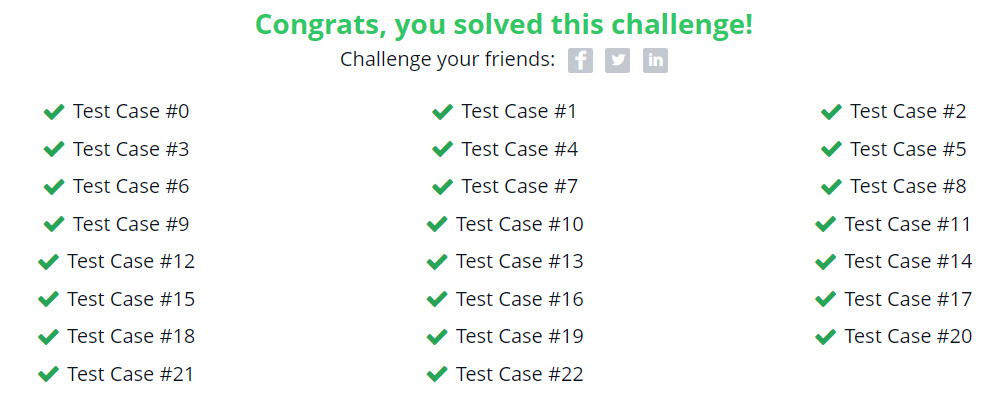